In [8]:
# Import libraries necessary for this project

%matplotlib inline

import skvideo.io
import skimage.data
import skimage.filters
import skimage.io
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage import color
from matplotlib import cm
import skimage.morphology

hola

In [2]:
videogen = skvideo.io.vread('data/processed_videos/video1.avi')

In [3]:
videogen.shape

(499, 240, 320, 3)

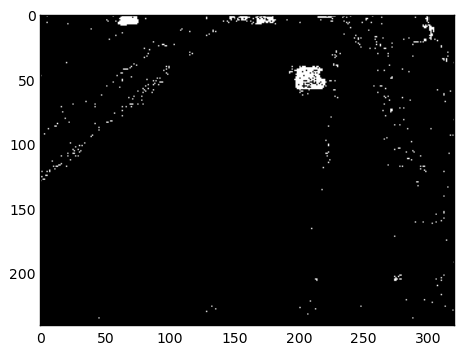

In [10]:
img = videogen[100,:,:,:]
plt.imshow(img)

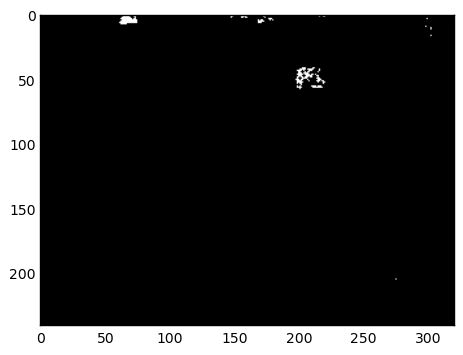

In [11]:
img2 = skimage.morphology.erosion(img)
plt.imshow(img2)

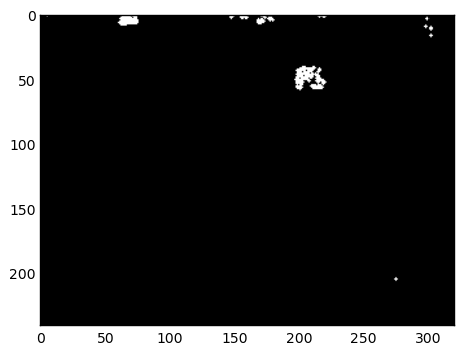

In [12]:
img3 = skimage.morphology.dilation(img2)
plt.imshow(img3)

In [30]:
img3.shape

(240, 320, 3)

In [36]:
temp=[]
for i in range(videogen.shape[0]):
    frame = videogen[i,:,:,:]
    frame2 = skimage.morphology.erosion(frame)
    frame3 = skimage.morphology.dilation(frame2)
    temp.append(frame3)
processed=np.array(temp)

In [37]:
processed.shape

(499, 240, 320, 3)

In [ ]:
skvideo.io.vwrite("", processed)